<a href="https://colab.research.google.com/github/YayunEldina/PCVK_Ganjil_2024/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modul 10**

- **Nama  : Yayun Eldina**
- **NIM   : 2241720065**
- **Kelas : TI-3F**

## **Tugas Praktikum**

1. Import folder yang ada google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas.

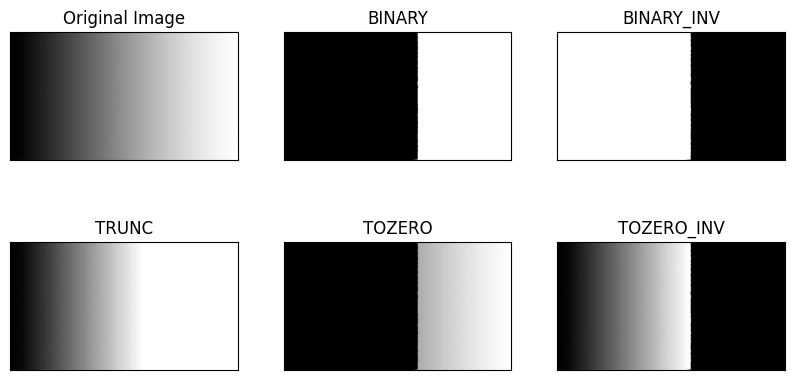

In [3]:
image = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/gradient.jpg', cv2.IMREAD_GRAYSCALE)

# Threshold value
threshold = 170

# BINARY
binary = np.where(image > threshold, 255, 0).astype(np.uint8)

# BINARY_INV
binary_inv = np.where(image > threshold, 0, 255).astype(np.uint8)

# TRUNC
trunc = np.where(image > threshold, threshold, image).astype(np.uint8)

# TOZERO
tozero = np.where(image > threshold, image, 0).astype(np.uint8)

# TOZERO_INV
tozero_inv = np.where(image > threshold, 0, image).astype(np.uint8)

# Plot hasilnya
images = [image, binary, binary_inv, trunc, tozero, tozero_inv]
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']

plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

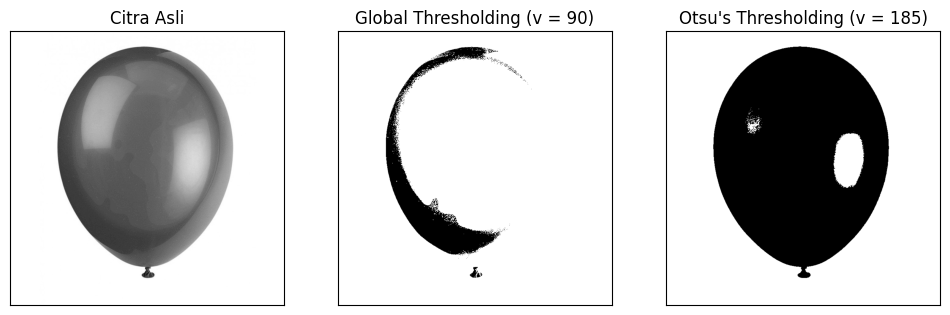

In [4]:
# Otsu Thresholding tanpa Livrary

def otsu_threshold(image):
    # Hitung histogram
    histogram, bins = np.histogram(image.ravel(), 256, [0, 256])

    # Hitung probabilitas kumulatif
    total_pixels = image.shape[0] * image.shape[1]
    current_max, threshold = 0, 0
    sum_total, sum_foreground = 0, 0
    weight_background, weight_foreground = 0, 0

    for i in range(256):
        sum_total += i * histogram[i]

    sum_background = 0

    # hreshold yang memaksimalkan between-class variance
    for i in range(256):
        weight_background += histogram[i]
        if weight_background == 0:
            continue
        weight_foreground = total_pixels - weight_background
        if weight_foreground == 0:
            break

        sum_background += i * histogram[i]
        mean_background = sum_background / weight_background
        mean_foreground = (sum_total - sum_background) / weight_foreground

        # Between Class Variance
        between_class_variance = weight_background * weight_foreground * (mean_background - mean_foreground) ** 2

        # Simpan nilai threshold yang memaksimalkan between-class variance
        if between_class_variance > current_max:
            current_max = between_class_variance
            threshold = i

    # Thresholding dengan nilai threshold Otsu
    otsu_result = np.where(image > threshold, 255, 0).astype(np.uint8)
    return otsu_result, threshold

# Membaca citra balon
image = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/balloon.jpg', cv2.IMREAD_GRAYSCALE)

# Otsu Thresholding
otsu_result, otsu_threshold_value = otsu_threshold(image)

# Global Thresholding biasa dengan nilai 90
global_threshold_value = 90
global_result = np.where(image > global_threshold_value, 255, 0).astype(np.uint8)

# Hasilnya
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Asli')
axes[0].set_xticks([])
axes[0].set_yticks([])


plt.subplot(1, 3, 2)
plt.imshow(global_result, cmap='gray')
plt.title(f'Global Thresholding (v = {global_threshold_value})')
axes[1].set_xticks([])
axes[1].set_yticks([])

plt.subplot(1, 3, 3)
plt.imshow(otsu_result, cmap='gray')
plt.title(f'Otsu\'s Thresholding (v = {otsu_threshold_value})')
axes[2].set_xticks([])
axes[2].set_yticks([])

plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images. Petunjuk:

- anda dapat gunakan cv.calcHist untuk menampilkan histogram.
- link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
- yaitu mask. Jika diset None, maka keseluruhan image akan dihitung histogramnya. Jika kita tentukan mask, maka hanya bagian image yang dimasking warna putih yang akan dihitung histogramnya (dari contoh dibawah dinamakan dengan Citra Segment).

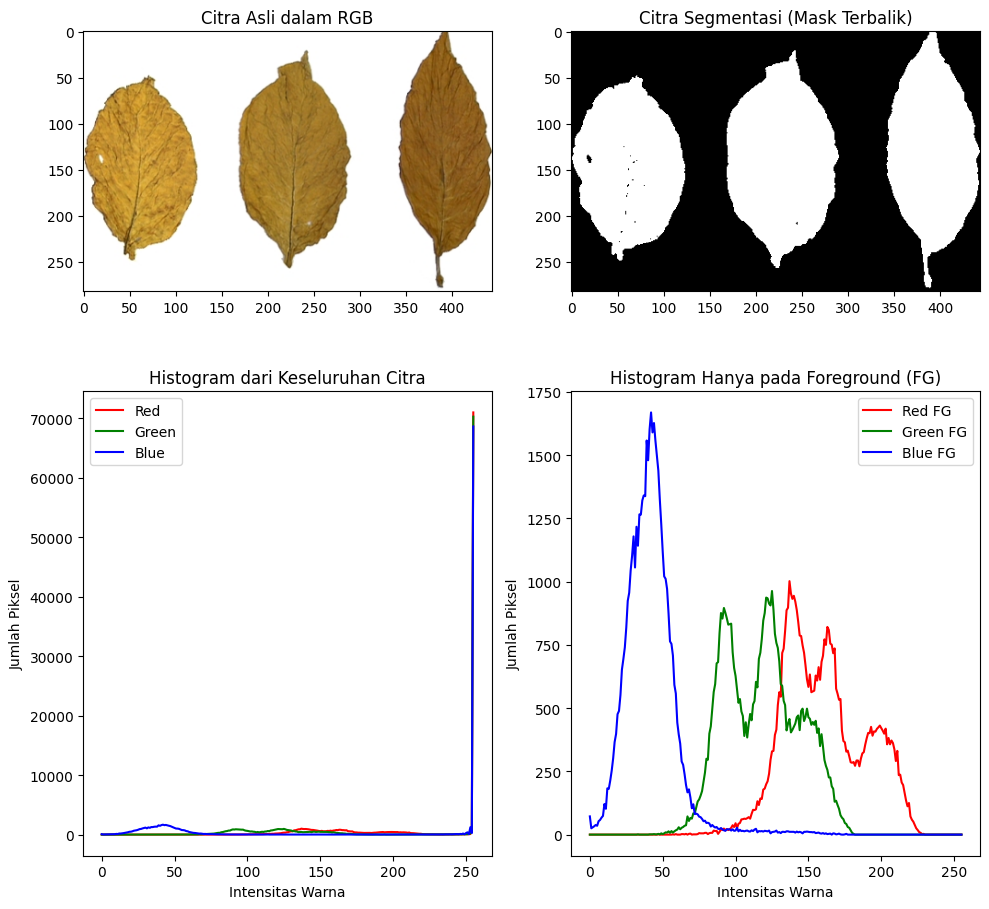

In [7]:
# Histogram Citra Segmentasi

import cv2 as cv

# Langkah 1: Membaca gambar
tobacco_img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/tobacco.jpg')
image_rgb = cv.cvtColor(tobacco_img, cv.COLOR_BGR2RGB)

# Langkah 2: Membuat mask untuk menandai foreground (dengan sedikit modifikasi nilai threshold)
gray_image = cv.cvtColor(tobacco_img, cv.COLOR_BGR2GRAY)
_, mask = cv.threshold(gray_image, 180, 255, cv.THRESH_BINARY_INV)  # Membalik foreground jadi putih

# Langkah 3: Hitung histogram keseluruhan citra untuk setiap channel RGB
hist_total_r = cv.calcHist([tobacco_img], [2], None, [256], [0, 256])
hist_total_b = cv.calcHist([tobacco_img], [0], None, [256], [0, 256])
hist_total_g = cv.calcHist([tobacco_img], [1], None, [256], [0, 256])

# Langkah 4: Hitung histogram hanya pada foreground dengan menggunakan mask (untuk setiap channel RGB)
hist_fg_r = cv.calcHist([image_rgb], [0], mask, [256], [0, 256])
hist_fg_g = cv.calcHist([image_rgb], [1], mask, [256], [0, 256])
hist_fg_b = cv.calcHist([image_rgb], [2], mask, [256], [0, 256])

# Langkah 5: Tampilkan hasilnya
plt.figure(figsize=(10, 10))

# Plot 1: Tampilkan citra asli dalam RGB
plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title('Citra Asli dalam RGB')

# Plot 2: Tampilkan citra segmentasi dengan mask
plt.subplot(2, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Citra Segmentasi (Mask Terbalik)')

# Plot 3: Histogram dari keseluruhan citra untuk setiap channel RGB
plt.subplot(2, 2, 3)
plt.plot(hist_total_r, color='r', label='Red')
plt.plot(hist_total_g, color='g', label='Green')
plt.plot(hist_total_b, color='b', label='Blue')
plt.title('Histogram dari Keseluruhan Citra')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Piksel')
plt.legend()

# Plot 4: Histogram hanya untuk foreground (FG) objek
plt.subplot(2, 2, 4)
plt.plot(hist_fg_r, color='r', label='Red FG')
plt.plot(hist_fg_g, color='g', label='Green FG')
plt.plot(hist_fg_b, color='b', label='Blue FG')
plt.title('Histogram Hanya pada Foreground (FG)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Piksel')
plt.legend()

plt.tight_layout()
plt.show()

6. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)

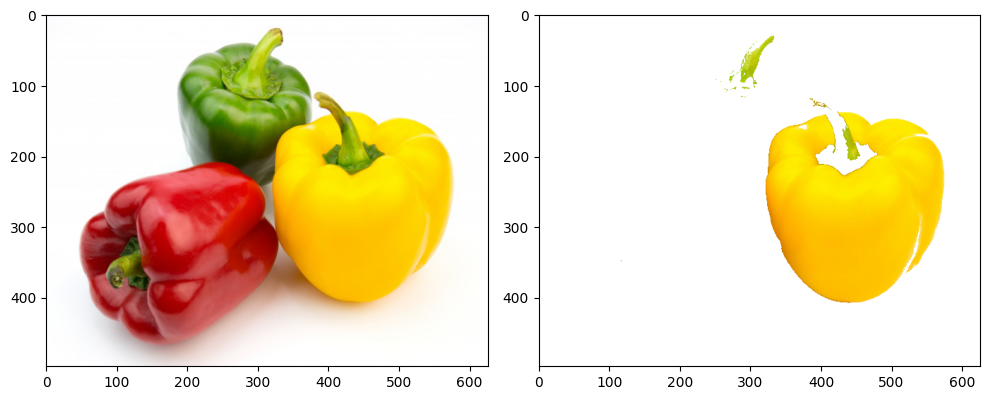

In [9]:
# Segmentasi Warna

# Langkah 1: Baca gambar
image = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/peppers.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # Ubah dari BGR ke RGB

# Langkah 2: Ubah gambar menjadi data 2D untuk K-Means
pixel_values = image.reshape((-1, 3))  # Bentuk ulang gambar menjadi array 2D
pixel_values = np.float32(pixel_values)  # Ubah ke tipe data float32

# Langkah 3: Tetapkan k dan lakukan K-Means clustering
k = 5  # Jumlah cluster yang digunakan
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Langkah 4: Ubah label hasil clustering ke warna
segmented_image = centers[labels.flatten()]  # Ambil nilai pusat cluster
segmented_image = segmented_image.reshape(image.shape)  # Ubah kembali ke bentuk gambar asli

# Langkah 5: Ubah segmented image ke HSV untuk segmentasi warna kuning
hsv_image = cv.cvtColor(segmented_image.astype(np.uint8), cv.COLOR_RGB2HSV)

# Definisikan batas warna kuning dalam ruang warna HSV
lower_yellow = np.array([20, 100, 100])  # Batas bawah warna kuning
upper_yellow = np.array([30, 255, 255])  # Batas atas warna kuning

# Membuat mask untuk warna kuning
yellow_mask = cv.inRange(hsv_image, lower_yellow, upper_yellow)

# Langkah 6: Terapkan mask pada gambar asli
result = cv.bitwise_and(image, image, mask=yellow_mask)

# Langkah 7: Ubah latar belakang menjadi putih
# Buat latar belakang putih
white_background = np.full(image.shape, 255, dtype=np.uint8)  # Membuat gambar putih dengan ukuran yang sama

# Gabungkan hasil segmentasi dengan latar belakang putih
result_with_white_bg = np.where(yellow_mask[:, :, np.newaxis] == 255, result, white_background)

# Menampilkan gambar asli
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('on')

# Menampilkan hasil segmentasi
plt.subplot(1, 2, 2)
plt.imshow(result_with_white_bg)
plt.axis('on')

plt.tight_layout()
plt.show()

7. Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code dan hasil image di modul ini.

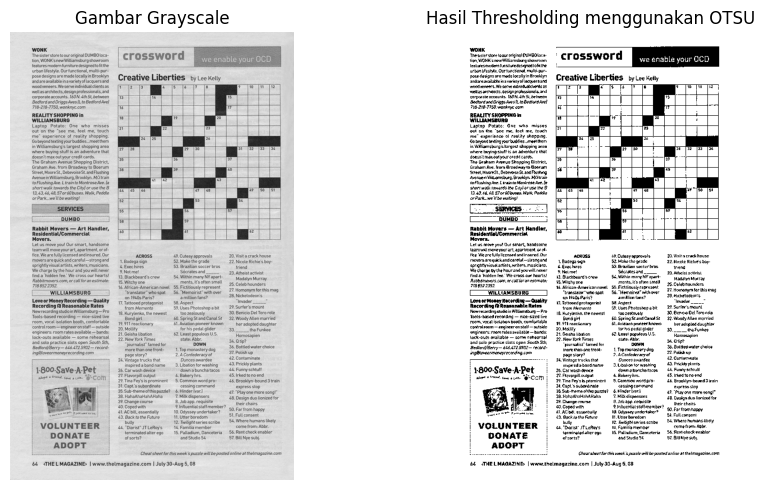

In [10]:
# Thresholding Biner

# Langkah 1: Baca gambar
crossword_img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/crossword.jpg')

# Langkah 2: Ubah gambar ke grayscale
gray_crossword = cv.cvtColor(crossword_img, cv.COLOR_BGR2GRAY)

# Langkah 3: Lakukan thresholding biner menggunakan Otsu
ret, binary_crossword = cv.threshold(gray_crossword, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Langkah 4: Tampilkan hasil
plt.figure(figsize=(10, 5))

# Tampilkan gambar grayscale
plt.subplot(1, 2, 1)
plt.imshow(gray_crossword, cmap='gray')
plt.title('Gambar Grayscale')
plt.axis('off')

# Tampilkan hasil thresholding biner
plt.subplot(1, 2, 2)
plt.imshow(binary_crossword, cmap='gray')
plt.title('Hasil Thresholding menggunakan OTSU')
plt.axis('off')

plt.tight_layout()
plt.show()